# MAESTRIA INTELIGENCIA  ARTIFICIAL

---

INTEGRANTES:
- Edwin Montenegro
- Galo Travez

## LABORATORIO 5
### OBJETIVO
El objetivo principal del taller es comparar el rendimiento de diferentes arquitecturas de redes neuronales recurrentes (RNN, LSTM y GRU) en una tarea de clasificación de sentimientos. Se busca entrenar y evaluar los modelos para entender cuál de estas arquitecturas es más efectiva para este tipo de tarea y extraer conclusiones basadas en las métricas obtenidas

# INDICE
- Carga y Exploración de Datos:
- Preparación de los Datos:
- Definición y construcción de tres modelos:
- Entrenamiento de los Modelos:
- Evaluación de los Modelos:


In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, LSTM, GRU
from sklearn.metrics import classification_report, f1_score

In [19]:
# Verificar si TensorFlow está usando la GPU
print("¿TensorFlow está usando la GPU?:", tf.config.list_physical_devices('GPU'))

¿TensorFlow está usando la GPU?: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:2', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:3', device_type='GPU')]


In [2]:
# Cargar el archivo TSV
data = pd.read_csv('/home/emontenegrob/Labs_NLP/data/train.tsv', sep='\t')

# Mostrar las primeras filas del dataset
print(data.head())


   PhraseId  SentenceId                                             Phrase  \
0         1           1  A series of escapades demonstrating the adage ...   
1         2           1  A series of escapades demonstrating the adage ...   
2         3           1                                           A series   
3         4           1                                                  A   
4         5           1                                             series   

   Sentiment  
0          1  
1          2  
2          2  
3          2  
4          2  


In [3]:
# Ajustar las clases de Sentiment correctamente
# 0 - Negativo, 1 - Algo negativo, 2 - Neutral, 3 - Algo positivo, 4 - Positivo
def map_sentiment(value):
    if value == 0:
        return 0  # Negativo
    elif value == 1:
        return 1  # Algo negativo
    elif value == 2:
        return 2  # Neutral
    elif value == 3:
        return 3  # Algo positivo
    else:
        return 4  # Positivo

data['Sentiment'] = data['Sentiment'].map(map_sentiment)

# Mostrar la distribución de las nuevas etiquetas
print(data['Sentiment'].value_counts())

Sentiment
2    79582
3    32927
1    27273
4     9206
0     7072
Name: count, dtype: int64


# Graficar la distribución de las clases


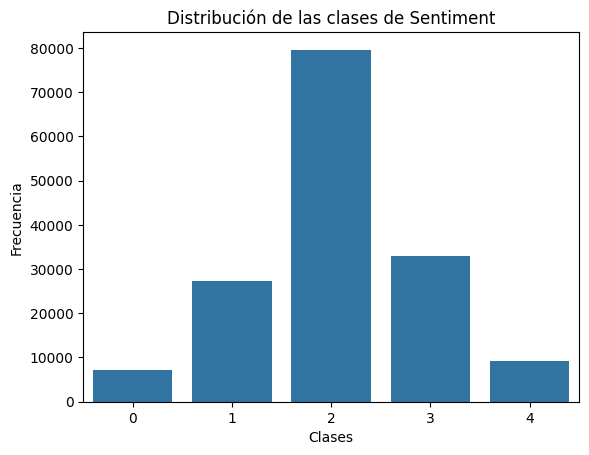

In [4]:
# Graficar la distribución de las clases usando seaborn
sns.countplot(x='Sentiment', data=data)
plt.title("Distribución de las clases de Sentiment")
plt.xlabel("Clases")
plt.ylabel("Frecuencia")
plt.show()

# Interpretación de datos
- La distribución de las clases es altamente desbalanceada. La clase 2 (neutral) domina con la mayor cantidad de ejemplos, seguida por las clases 1 (algo negativo) y 3 (algo positivo), mientras que las clases 0 (negativo) y 4 (positivo) son significativamente menos comunes.

In [6]:
# Dividir los datos en entrenamiento y prueba de manera estratificada
X = data['Phrase'].values  # Las frases (reseñas)
y = data['Sentiment'].values  # Las etiquetas (sentimientos)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13, stratify=y)

print(f'Tamaño del conjunto de entrenamiento: {len(X_train)}')
print(f'Tamaño del conjunto de prueba: {len(X_test)}')

Tamaño del conjunto de entrenamiento: 124848
Tamaño del conjunto de prueba: 31212


In [10]:
# Definir el número máximo de palabras que usaremos
vocab_size = 10000  # Ajusta este valor según tu dataset
max_length = 100  # Longitud máxima de las secuencias de palabras

# Crear el tokenizador
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

# Convertir las frases a secuencias de tokens
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

# Hacer padding a las secuencias para que tengan la misma longitud
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Mostrar la primera secuencia tokenizada y con padding
print(X_train_padded[0])

[  9   3 359  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [11]:
# Imprimir las primeras 5 secuencias tokenizadas
for i in range(5):
    print(f"Secuencia {i+1}: {X_train_padded[i]}")

# Obtener el índice de palabras
word_index = tokenizer.word_index

# Mostrar las primeras 20 palabras del vocabulario
for word, index in list(word_index.items())[:20]:
    print(f"{word}: {index}")

Secuencia 1: [  9   3 359  16   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]
Secuencia 2: [  59  427 1072 1200   14 1132    5   64    1  582    6   89  200    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]
Secuencia 3: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [12]:
# Ajustar la longitud máxima para padding
max_length = 50
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding='post')

# Calcular la longitud de cada secuencia
lengths = [len(seq) for seq in X_train_sequences]


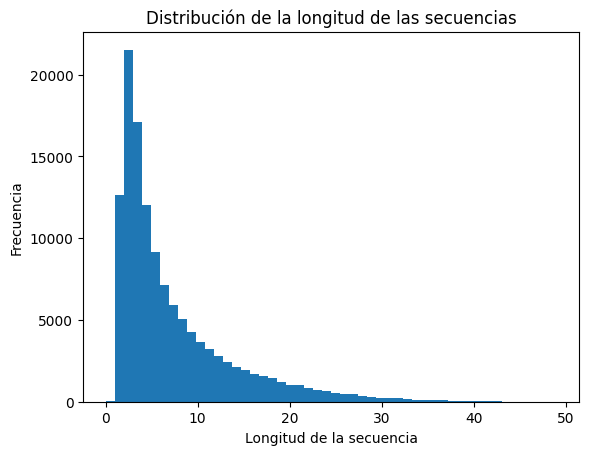

In [13]:
# Graficar la distribución de las longitudes de secuencias
plt.hist(lengths, bins=50)
plt.title("Distribución de la longitud de las secuencias")
plt.xlabel("Longitud de la secuencia")
plt.ylabel("Frecuencia")
plt.show()

###  Definir el modelo RNN
- Entrada: El modelo recibe frases (texto) como entrada.
- Procesamiento: A través de la capa de embedding y la capa recurrente, el modelo transforma la secuencia de palabras y procesa su significado.
- Salida: El modelo predice una de las cinco clases de sentimiento basándose en la secuencia completa.


In [14]:
# Definir el modelo RNN
model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_rnn.add(SimpleRNN(units=64, return_sequences=False))  # La capa RNN
model_rnn.add(Dense(5, activation='softmax'))  # Cinco clases: Negativo, Algo negativo, Neutral, Algo positivo, Positivo

# Compilar el modelo
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo RNN
model_rnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 50, 64)            640000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 64)                8256      
                                                                 
 dense (Dense)               (None, 5)                 325       
                                                                 
Total params: 648581 (2.47 MB)
Trainable params: 648581 (2.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Definir el modelo LSTM
- Entrada: Las frases de texto se convierten en secuencias numéricas mediante la capa Embedding.
- Procesamiento Secuencial: La capa LSTM procesa la secuencia de palabras, "recordando" información importante de la secuencia, y devuelve una representación condensada de la frase completa.
- Clasificación: La capa final toma esta representación y predice una de las cinco clases de sentimiento, asignando probabilidades a cada una y eligiendo la que tiene la mayor probabilidad.

In [15]:
# Definir el modelo LSTM
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_lstm.add(LSTM(units=64, return_sequences=False))  # La capa LSTM
model_lstm.add(Dense(5, activation='softmax'))  # Cinco clases

# Compilar el modelo LSTM
model_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Resumen del modelo LSTM
model_lstm.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 64)            640000    
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                                 
Total params: 673349 (2.57 MB)
Trainable params: 673349 (2.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Definir el modelo GRU
- Entrada: Las frases (convertidas en secuencias de números) pasan por la capa de embedding, que las convierte en vectores numéricos.
- Procesamiento Secuencial: La capa GRU procesa la secuencia de palabras, aprendiendo patrones a lo largo de la secuencia, y genera una representación final de la frase.
- Clasificación: La capa final utiliza esta representación para predecir la clase de sentimiento de la frase.

In [16]:
# Definir el modelo GRU
model_gru = Sequential()
model_gru.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length))
model_gru.add(GRU(units=64, return_sequences=False))  # La capa GRU
model_gru.add(Dense(5, activation='softmax'))  # Cinco clases

# Compilar el modelo GRU
model_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo GRU
model_gru.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 64)            640000    
                                                                 
 gru (GRU)                   (None, 64)                24960     
                                                                 
 dense_2 (Dense)             (None, 5)                 325       
                                                                 
Total params: 665285 (2.54 MB)
Trainable params: 665285 (2.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Parámetros de Entrenamiento:
La elección de 5 épocas y un batch_size de 32 permite un compromiso razonable entre rendimiento y eficiencia computacional. Estas configuraciones reducen el tiempo de entrenamiento y la demanda de recursos de procesamiento, haciendo que sea posible comparar rápidamente los tres modelos (RNN, LSTM y GRU)

In [21]:
# Entrenar el modelo RNN
history_rnn = model_rnn.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Entrenar el modelo LSTM
history_lstm = model_lstm.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Entrenar el modelo GRU
history_gru = model_gru.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))


Epoch 1/5
3902/3902 [==============================] - 233s 60ms/step - loss: 1.2289 - accuracy: 0.5197 - val_loss: 1.2603 - val_accuracy: 0.5253
Epoch 2/5
3902/3902 [==============================] - 252s 65ms/step - loss: 1.2292 - accuracy: 0.5316 - val_loss: 1.1344 - val_accuracy: 0.5426
Epoch 3/5
3902/3902 [==============================] - 243s 62ms/step - loss: 1.0670 - accuracy: 0.5723 - val_loss: 1.0647 - val_accuracy: 0.5761
Epoch 4/5
3902/3902 [==============================] - 221s 57ms/step - loss: 1.0795 - accuracy: 0.5711 - val_loss: 1.1155 - val_accuracy: 0.5570
Epoch 5/5
3902/3902 [==============================] - 277s 71ms/step - loss: 0.9992 - accuracy: 0.6020 - val_loss: 1.0307 - val_accuracy: 0.5905
Epoch 1/5
3902/3902 [==============================] - 83s 20ms/step - loss: 1.0929 - accuracy: 0.5669 - val_loss: 0.9688 - val_accuracy: 0.6182
Epoch 2/5
3902/3902 [==============================] - 47s 12ms/step - loss: 0.9126 - accuracy: 0.6377 - val_loss: 0.8798 - v

In [22]:
# Hacer predicciones
y_pred_rnn = model_rnn.predict(X_test_padded)
y_pred_lstm = model_lstm.predict(X_test_padded)
y_pred_gru = model_gru.predict(X_test_padded)

976/976 [==============================] - 5s 5ms/step


In [23]:
# Convertir las predicciones a etiquetas
y_pred_rnn = y_pred_rnn.argmax(axis=1)
y_pred_lstm = y_pred_lstm.argmax(axis=1)
y_pred_gru = y_pred_gru.argmax(axis=1)

In [24]:
# Evaluar el modelo RNN
print("Reporte de clasificación RNN:")
print(classification_report(y_test, y_pred_rnn, target_names=['Negativo', 'Algo negativo', 'Neutral', 'Algo positivo', 'Positivo']))


Reporte de clasificación RNN:
               precision    recall  f1-score   support

     Negativo       0.00      0.00      0.00      1414
Algo negativo       0.36      0.29      0.32      5455
      Neutral       0.67      0.84      0.74     15917
Algo positivo       0.50      0.51      0.51      6585
     Positivo       0.67      0.09      0.16      1841

     accuracy                           0.59     31212
    macro avg       0.44      0.35      0.35     31212
 weighted avg       0.55      0.59      0.55     31212



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [25]:
# Evaluar el modelo LSTM
print("Reporte de clasificación LSTM:")
print(classification_report(y_test, y_pred_lstm, target_names=['Negativo', 'Algo negativo', 'Neutral', 'Algo positivo', 'Positivo']))


Reporte de clasificación LSTM:
               precision    recall  f1-score   support

     Negativo       0.54      0.37      0.44      1414
Algo negativo       0.55      0.53      0.54      5455
      Neutral       0.74      0.82      0.78     15917
Algo positivo       0.58      0.60      0.59      6585
     Positivo       0.69      0.26      0.37      1841

     accuracy                           0.67     31212
    macro avg       0.62      0.51      0.54     31212
 weighted avg       0.66      0.67      0.66     31212



In [26]:
# Evaluar el modelo GRU
print("Reporte de clasificación GRU:")
print(classification_report(y_test, y_pred_gru, target_names=['Negativo', 'Algo negativo', 'Neutral', 'Algo positivo', 'Positivo']))



Reporte de clasificación GRU:
               precision    recall  f1-score   support

     Negativo       0.57      0.29      0.38      1414
Algo negativo       0.56      0.57      0.57      5455
      Neutral       0.74      0.83      0.78     15917
Algo positivo       0.60      0.57      0.59      6585
     Positivo       0.63      0.37      0.47      1841

     accuracy                           0.68     31212
    macro avg       0.62      0.52      0.56     31212
 weighted avg       0.67      0.68      0.67     31212



In [27]:
# Calcular y mostrar el F1-Score ponderado
f1_rnn = f1_score(y_test, y_pred_rnn, average='weighted')
f1_lstm = f1_score(y_test, y_pred_lstm, average='weighted')
f1_gru = f1_score(y_test, y_pred_gru, average='weighted')


In [28]:
print(f"Puntuación F1 ponderada RNN: {f1_rnn}")
print(f"Puntuación F1 ponderada LSTM: {f1_lstm}")
print(f"Puntuación F1 ponderada GRU: {f1_gru}")

Puntuación F1 ponderada RNN: 0.5522394356416261
Puntuación F1 ponderada LSTM: 0.657805986376875
Puntuación F1 ponderada GRU: 0.6667231494686312


# COCLUSIONES
- El modelo RNN fue el que tuvo el desempeño más bajo de los tres. Con un F1-score ponderado de 0.55 y una exactitud del 59%, no logró capturar bien la complejidad de las frases. Esto es algo esperado, ya que las redes RNN simples suelen tener problemas para manejar secuencias largas o complicadas. Tienden a perder información importante a medida que avanzan en la secuencia, lo que afecta su capacidad para clasificar de manera precisa.
- El modelo LSTM, en cambio, mostró un avance notable. Con un F1-score de 0.66 y una exactitud del 67%, logró identificar patrones más complejos en el texto. Esto es gracias a su capacidad para "recordar" información a largo plazo, algo que lo hace más apto para trabajar con secuencias de texto largas o complicadas. En resumen, el LSTM es mucho mejor que el RNN a la hora de tratar este tipo de datos.

- Finalmente, el modelo GRU fue el que obtuvo los mejores resultados. Con un F1-score ponderado de 0.67 y una exactitud del 67%, superó al LSTM por un pequeño margen. Aunque el GRU es más sencillo que el LSTM en cuanto a estructura, tiende a ser más eficiente, lo que en este caso le permitió tener un rendimiento ligeramente superior. Además de ser más rápido, el GRU también demostró ser muy capaz para esta tarea de clasificación.

#Comparación  de Resultados de Naive Bayes con los otros modelos
Resultados de Naive Bayes laboratorio 2 :
- Precisión (accuracy): 0.61
- F1-score ponderado: 0.61
- Macro F1-score: 0.46


- El modelo Naive Bayes supera al modelo RNN tanto en precisión como en el F1-score ponderado. Esto es común, ya que las RNN simples pueden tener dificultades para manejar dependencias largas y capturar información contextual, especialmente con pocos recursos o pocas épocas de entrenamiento
- El modelo LSTM supera al modelo Naive Bayes en todas las métricas. Esto es esperable, ya que las LSTM son más potentes para capturar relaciones secuenciales y patrones contextuales complejos en el texto
- El modelo GRU también supera al modelo Naive Bayes en todas las métricas, de manera similar al LSTM. A pesar de ser más simple que el LSTM, el GRU logra un rendimiento ligeramente mejor que el Naive Bayes gracias a su capacidad para procesar dependencias secuenciales, pero de una manera más eficiente que las LSTM
- Si bien Naive Bayes ofrece una solución rápida y eficiente, LSTM y GRU son más efectivos para tareas donde las dependencias contextuales son importantes, logrando un mejor rendimiento global.